# Decision Tree & other Machine Learning Techniques used

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report

import matplotlib.pyplot as plt
import pandas as pd 

""" First change the following directory link to where all input files do exist """
import os
# Get the current working directory
current_directory = os.getcwd()

hrattr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv") 
 
print (hrattr_data.head())
list(hrattr_data)


# Data Preprocessing
hrattr_data['Attrition_ind'] = 0
hrattr_dataloc = hrattr_data.loc[hrattr_data['Attrition']=='Yes','Attrition_ind'] = 1

dummy_busnstrvl = pd.get_dummies(hrattr_data['BusinessTravel'], prefix='busns_trvl')
dummy_dept = pd.get_dummies(hrattr_data['Department'], prefix='dept')
dummy_edufield = pd.get_dummies(hrattr_data['EducationField'], prefix='edufield')
dummy_gender = pd.get_dummies(hrattr_data['Gender'], prefix='gend')
dummy_jobrole = pd.get_dummies(hrattr_data['JobRole'], prefix='jobrole')
dummy_maritstat = pd.get_dummies(hrattr_data['MaritalStatus'], prefix='maritalstat') 
dummy_overtime = pd.get_dummies(hrattr_data['OverTime'], prefix='overtime') 

continuous_columns = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
'YearsWithCurrManager']

hrattr_continuous = hrattr_data[continuous_columns]

hrattr_continuous['Age'].describe()
hrattr_data['BusinessTravel'].value_counts()

hrattr_data_new = pd.concat([dummy_busnstrvl,dummy_dept,dummy_edufield,dummy_gender,dummy_jobrole,
  dummy_maritstat,dummy_overtime,hrattr_continuous,hrattr_data['Attrition_ind']],axis=1)

# Train & Test split
x_train,x_test,y_train,y_test = train_test_split(hrattr_data_new.drop(['Attrition_ind'],axis=1),
                                                 hrattr_data_new['Attrition_ind'],train_size = 0.7,random_state=42)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dt_fit.fit(x_train,y_train)

print ("\nDecision Tree - Train Confusion Matrix\n\n",pd.crosstab(y_train,dt_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))
print ("\nDecision Tree - Train Classification Report\n",classification_report(y_train,dt_fit.predict(x_train)))

print ("\n\nDecision Tree - Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
print ("\nDecision Tree - Test Classification Report\n",classification_report(y_test,dt_fit.predict(x_test)))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [11]:
# Grid Search is undertaken to itentify the best parameters tuning using class weights
# Tuning class weights to analyze accuracy, precision & recall
dummyarray = np.empty((6,10))
dt_wttune = pd.DataFrame(dummyarray)

dt_wttune.columns = ["zero_wght","one_wght","tr_accuracy","tst_accuracy","prec_zero","prec_one",
                     "prec_ovll","recl_zero","recl_one","recl_ovll"]

zero_clwghts = [0.01,0.1,0.2,0.3,0.4,0.5]

for i in range(len(zero_clwghts)):
    clwght = {0:zero_clwghts[i],1:1.0-zero_clwghts[i]}
    dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                    min_samples_leaf=1,random_state=42,class_weight = clwght)
    dt_fit.fit(x_train,y_train)
    dt_wttune.loc[i, 'zero_wght'] = clwght[0]       
    dt_wttune.loc[i, 'one_wght'] = clwght[1]     
    dt_wttune.loc[i, 'tr_accuracy'] = round(accuracy_score(y_train,dt_fit.predict(x_train)),3)    
    dt_wttune.loc[i, 'tst_accuracy'] = round(accuracy_score(y_test,dt_fit.predict(x_test)),3)    
        
    clf_sp = classification_report(y_test,dt_fit.predict(x_test)).split()
    dt_wttune.loc[i, 'prec_zero'] = float(clf_sp[5])   
    dt_wttune.loc[i, 'prec_one'] = float(clf_sp[10])   
    #dt_wttune.loc[i, 'prec_ovll'] = float(clf_sp[17])   
    dt_wttune.loc[i, 'recl_zero'] = float(clf_sp[6])   
    dt_wttune.loc[i, 'recl_one'] = float(clf_sp[11])   
    #dt_wttune.loc[i, 'recl_ovll'] = float(clf_sp[18])
    print ("\nClass Weights",clwght,"Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3),"Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
    print ("Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))
    print ("\n**Class Weights {0: 0.2, 1: 0.8} is the best one based on various iterations**")


Class Weights {0: 0.01, 1: 0.99} Train accuracy: 0.342 Test accuracy: 0.272
Test Confusion Matrix

 Predicted   0    1
Actuall           
0          65  315
1           6   55

**Class Weights {0: 0.2, 1: 0.8} is the best one based on various iterations**

Class Weights {0: 0.1, 1: 0.9} Train accuracy: 0.806 Test accuracy: 0.732
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          282  98
1           20  41

**Class Weights {0: 0.2, 1: 0.8} is the best one based on various iterations**

Class Weights {0: 0.2, 1: 0.8} Train accuracy: 0.871 Test accuracy: 0.83
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          341  39
1           36  25

**Class Weights {0: 0.2, 1: 0.8} is the best one based on various iterations**

Class Weights {0: 0.3, 1: 0.7} Train accuracy: 0.881 Test accuracy: 0.837
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          345  35
1           37  24

**Class Weights {0: 0.2, 1: 0.8} is the best one based on 

In [12]:
#Installation of any libraries which are missing needs to be undertaken
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 365.7 kB/s eta 0:05:42
   ---------------------------------------- 0.1/124.9 MB 476.3 kB/s eta 0:04:23
   ---------------------------------------- 0.1/124.9 MB 554.9 kB/s eta 0:03:45
   ---------------------------------------- 0.2/124.9 MB 734.2 kB/s eta 0:02:50
   ---------------------------------------- 0.3/124.9 MB 905.4 kB/s eta 0:02:18
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:50
   ---------------------------------------- 0.5/124.9 MB 1.2 MB/s eta 0:01:47
   ---------------------------------------- 0.6/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 0.8/124.9 MB 1.7 MB/s eta 0:0

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          846    7
1           70  106

Bagging- Train accuracy 0.925

Bagging  - Train Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       853
           1       0.94      0.60      0.73       176

    accuracy                           0.93      1029
   macro avg       0.93      0.80      0.85      1029
weighted avg       0.93      0.93      0.92      1029



Bagging - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          372   8
1           48  13

Bagging - Test accuracy 0.873

Bagging - Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.62      0.21      0.32        61

    accuracy                           0.87       441
   macro avg       0.75      0.60      0.62       441
weighted avg       0.85      0.

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Random Forest - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          841   12
1           76  100

Random Forest - Train accuracy 0.914

Random Forest  - Train Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       853
           1       0.89      0.57      0.69       176

    accuracy                           0.91      1029
   macro avg       0.90      0.78      0.82      1029
weighted avg       0.91      0.91      0.91      1029



Random Forest - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          373   7
1           47  14

Random Forest - Test accuracy 0.878

Random Forest - Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.67      0.23      0.34        61

    accuracy                           0.88       441
   macro avg       0.78      0.61      0.64     

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          844    9
1           55  121

AdaBoost  - Train accuracy 0.938

AdaBoost  - Train Classification Report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       853
           1       0.93      0.69      0.79       176

    accuracy                           0.94      1029
   macro avg       0.93      0.84      0.88      1029
weighted avg       0.94      0.94      0.93      1029



AdaBoost  - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          360  20
1           38  23

AdaBoost  - Test accuracy 0.868

AdaBoost - Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       380
           1       0.53      0.38      0.44        61

    accuracy                           0.87       441
   macro avg       0.72      0.66      0.68       441
weighted avg       0.

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(



Gradient Boost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          850    3
1           49  127

Gradient Boost - Train accuracy 0.949

Gradient Boost  - Train Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       853
           1       0.98      0.72      0.83       176

    accuracy                           0.95      1029
   macro avg       0.96      0.86      0.90      1029
weighted avg       0.95      0.95      0.95      1029



Gradient Boost - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          362  18
1           37  24

Gradient Boost - Test accuracy 0.875

Gradient Boost - Test Classification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.57      0.39      0.47        61

    accuracy                           0.88       441
   macro avg       0.74      0.67      0.7

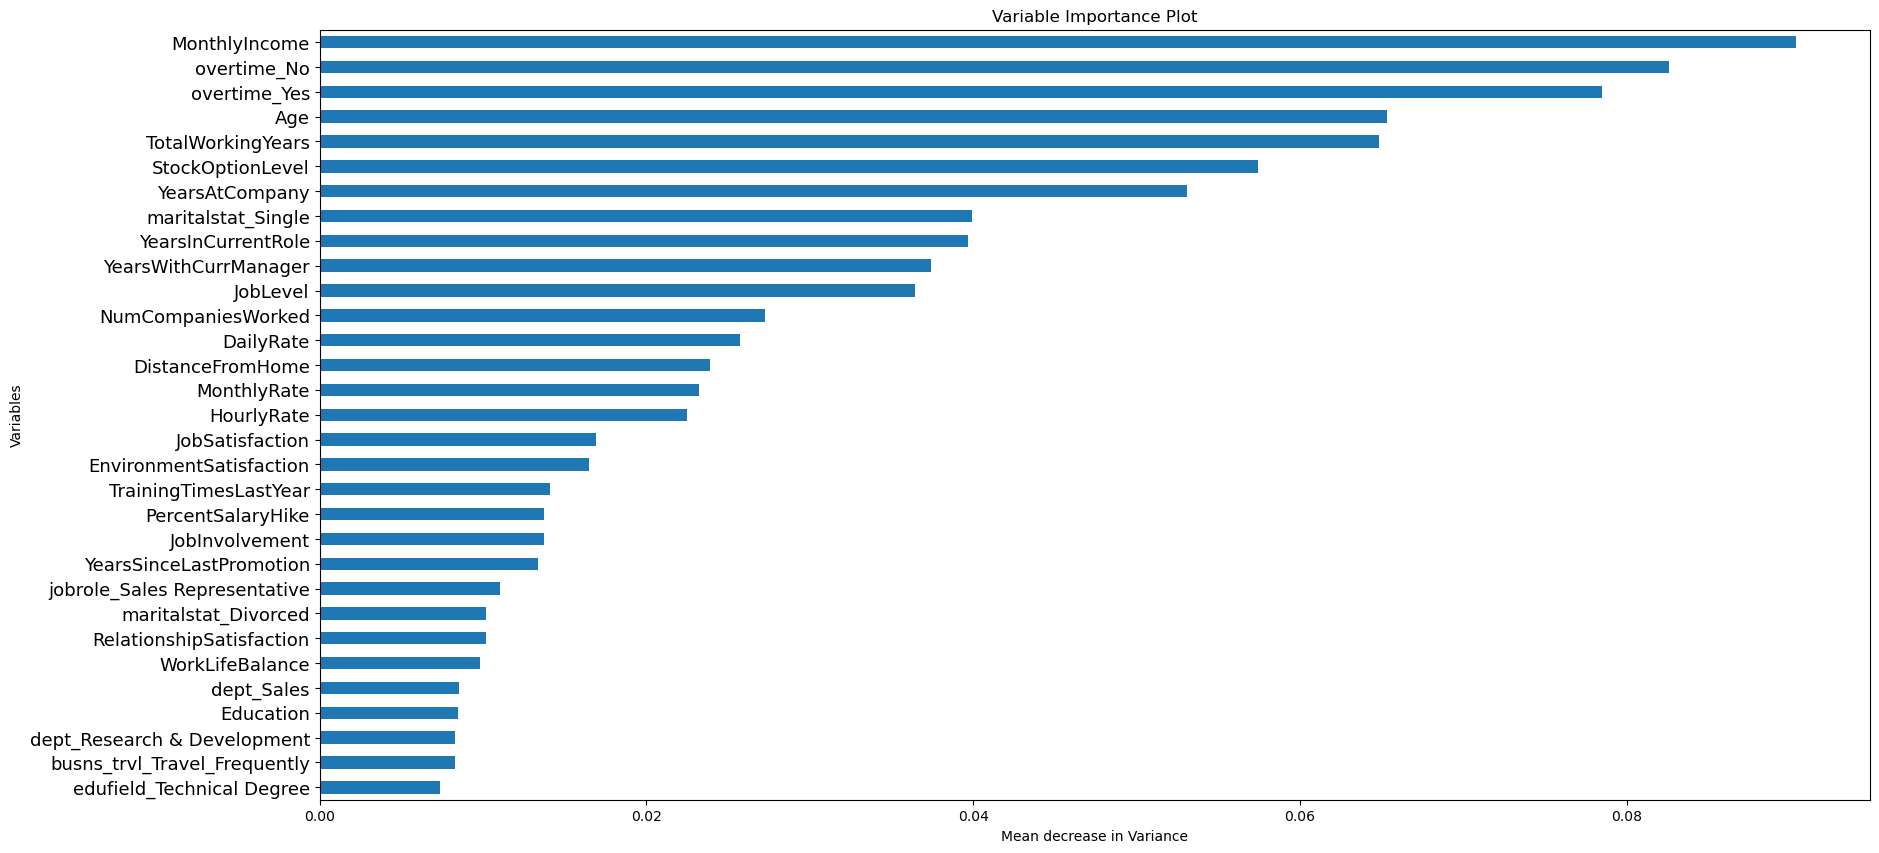

In [14]:
# Various Machine Learning Modelling Techniques Used to identify the best Model fit for the data in hand

# Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42,
                                class_weight = {0:0.3,1:0.7})

bag_fit = BaggingClassifier(base_estimator= dt_fit,n_estimators=5000,max_samples=0.67,max_features=1.0,
                            bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=42)

bag_fit.fit(x_train, y_train)

print ("\nBagging - Train Confusion Matrix\n\n",pd.crosstab(y_train,bag_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nBagging- Train accuracy",round(accuracy_score(y_train,bag_fit.predict(x_train)),3))
print ("\nBagging  - Train Classification Report\n",classification_report(y_train,bag_fit.predict(x_train)))

print ("\n\nBagging - Test Confusion Matrix\n\n",pd.crosstab(y_test,bag_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nBagging - Test accuracy",round(accuracy_score(y_test,bag_fit.predict(x_test)),3))
print ("\nBagging - Test Classification Report\n",classification_report(y_test,bag_fit.predict(x_test)))





# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_fit = RandomForestClassifier(n_estimators=5000,criterion="gini",max_depth=5,min_samples_split=2,bootstrap=True,
                                max_features='auto',random_state=42,min_samples_leaf=1,class_weight = {0:0.3,1:0.7})
rf_fit.fit(x_train,y_train)       

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))
print ("\nRandom Forest  - Train Classification Report\n",classification_report(y_train,rf_fit.predict(x_train)))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))
print ("\nRandom Forest - Test Classification Report\n",classification_report(y_test,rf_fit.predict(x_test)))





# Plot of Variable importance by mean decrease in gini
model_ranks = pd.Series(rf_fit.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name = 'Variables'
top_features = model_ranks.iloc[:31].sort_values(ascending=True,inplace=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)



# Random Forest Classifier - Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([
        ('clf',RandomForestClassifier(criterion='gini',class_weight = {0:0.3,1:0.7}))])

parameters = {
        'clf__n_estimators':(2000,3000,5000),
        'clf__max_depth':(5,15,30),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)

print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, predictions))
print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames = ["Predicted"])) 



# Adaboost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)

adabst_fit = AdaBoostClassifier(base_estimator= dtree,
        n_estimators=5000,learning_rate=0.05,random_state=42)

adabst_fit.fit(x_train, y_train)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Train accuracy",round(accuracy_score(y_train,adabst_fit.predict(x_train)),3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))


# In[28]:


# Gradientboost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc_fit = GradientBoostingClassifier(loss='deviance',learning_rate=0.05,n_estimators=5000,
                                     min_samples_split=2,min_samples_leaf=1,max_depth=1,random_state=42 )
gbc_fit.fit(x_train,y_train)

print ("\nGradient Boost - Train Confusion Matrix\n\n",pd.crosstab(y_train,gbc_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nGradient Boost - Train accuracy",round(accuracy_score(y_train,gbc_fit.predict(x_train)),3))
print ("\nGradient Boost  - Train Classification Report\n",classification_report(y_train,gbc_fit.predict(x_train)))

print ("\n\nGradient Boost - Test Confusion Matrix\n\n",pd.crosstab(y_test,gbc_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nGradient Boost - Test accuracy",round(accuracy_score(y_test,gbc_fit.predict(x_test)),3))
print ("\nGradient Boost - Test Classification Report\n",classification_report(y_test,gbc_fit.predict(x_test)))


# In[32]:


# Xgboost Classifier
import xgboost as xgb

xgb_fit = xgb.XGBClassifier(max_depth=2, n_estimators=5000, learning_rate=0.05)
xgb_fit.fit(x_train, y_train)

print ("\nXGBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,xgb_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nXGBoost - Train accuracy",round(accuracy_score(y_train,xgb_fit.predict(x_train)),3))
print ("\nXGBoost  - Train Classification Report\n",classification_report(y_train,xgb_fit.predict(x_train)))

print ("\n\nXGBoost - Test Confusion Matrix\n\n",pd.crosstab(y_test,xgb_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nXGBoost - Test accuracy",round(accuracy_score(y_test,xgb_fit.predict(x_test)),3))
print ("\nXGBoost - Test Classification Report\n",classification_report(y_test,xgb_fit.predict(x_test)))